# SL Pairs Overlap Analysis

Analyzing the overlap between our SL pairs and the collaborator's list (isha_list)
- Our pairs: target_gene ↔ biomarker_gene
- Collaborator's pairs: sg1_symbol ↔ sg2_symbol
- Order-independent comparison: (A,B) = (B,A)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import os

# Set style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', 30)

# Define constants
RESULT_DIR = "validation_growth_tissue"
TIMESTAMP = "20251015"

In [2]:
# Load the collaborator's list (isha_list)
ishan_list = pd.read_excel(
    "../data/A1_curated_gene_pairs_for_inclusion_in_combinatorial_library.xlsx"
)

# Load our coverage matrix with updated gene names
coverage_matrix_df_updated = pd.read_csv(
    f"./{RESULT_DIR}/coverage_matrix_{TIMESTAMP}.csv"
)

print("Collaborator's list shape:", ishan_list.shape)
print("Our SL pairs shape:", coverage_matrix_df_updated.shape)
print("\n" + "="*50)
print("Collaborator's list columns:")
print(ishan_list.columns.tolist())
print("\n" + "="*50)
print("Our SL pairs columns (first 10):")
print(coverage_matrix_df_updated.columns.tolist()[:10])


Collaborator's list shape: (1000, 19)
Our SL pairs shape: (2000, 10)

Collaborator's list columns:
['sorted_gene_pair', 'in_final_synergy_library', 'sg1_symbol', 'sg1_id', 'sg2_symbol', 'sg2_id', 'discover_mutex', 'discover_cooc_ess', 'paralog_pair', 'dekegel_definition', 'dekegel_prediction_rank', 'dekegel_prediction_score', 'dekegel_prediction_percentile', 'dekegel_high_value_pair', 'consensus_SL', 'consensus_non_SL', 'harle_unpublished_consensus_SL', 'parrish_positive_interactions', 'depmap_hit_only']

Our SL pairs columns (first 10):
['target_gene', 'biomarker_gene', 'HT-29_Female_Large_Intestine', 'A375_Female_Skin', 'Hs-940-T_Male_Skin', 'MS751_Female_Cervix', 'CCK-81_Female_Large_Intestine', 'NCI-H1915_Female_Lung', 'FDR_MOSA', 'Beta_MOSA']


In [3]:
# Examine the structure of both datasets
print("=== COLLABORATOR'S LIST (isha_list) ===")
print("First few rows:")
display(ishan_list.head())

# Check if the required columns exist
required_cols = ['sg1_symbol', 'sg2_symbol']
missing_cols = [col for col in required_cols if col not in ishan_list.columns]

if missing_cols:
    print(f"\nWARNING: Missing columns in collaborator's list: {missing_cols}")
    print("Available columns:", [col for col in ishan_list.columns if 'symbol' in col.lower() or 'gene' in col.lower()])
else:
    print(f"\n✓ Found required columns: {required_cols}")
    print(f"Non-null counts for sg1_symbol: {ishan_list['sg1_symbol'].count()}/{len(ishan_list)}")
    print(f"Non-null counts for sg2_symbol: {ishan_list['sg2_symbol'].count()}/{len(ishan_list)}")

print("\n=== OUR SL PAIRS (coverage_matrix_df_updated) ===")
print("First few rows (showing gene columns only):")
gene_cols = ['target_gene', 'biomarker_gene']
display(coverage_matrix_df_updated[gene_cols].head(10))

print(f"\nNon-null counts for target_gene: {coverage_matrix_df_updated['target_gene'].count()}/{len(coverage_matrix_df_updated)}")
print(f"Non-null counts for biomarker_gene: {coverage_matrix_df_updated['biomarker_gene'].count()}/{len(coverage_matrix_df_updated)}")


=== COLLABORATOR'S LIST (isha_list) ===
First few rows:


,sorted_gene_pair,in_final_synergy_library,sg1_symbol,sg1_id,sg2_symbol,sg2_id,discover_mutex,discover_cooc_ess,paralog_pair,dekegel_definition,dekegel_prediction_rank,dekegel_prediction_score,dekegel_prediction_percentile,dekegel_high_value_pair,consensus_SL,consensus_non_SL,harle_unpublished_consensus_SL,parrish_positive_interactions,depmap_hit_only
0,SMARCA2_SMARCA4,True,SMARCA2,HGNC:11098,SMARCA4,HGNC:11100,False,False,True,1.0,1.0,0.431303,0.1,1.0,0.0,0.0,0.0,0.0,0.0
1,EXOC6_EXOC6B,True,EXOC6,HGNC:23196,EXOC6B,HGNC:17085,False,False,True,1.0,2.0,0.411274,0.1,0.0,0.0,0.0,1.0,0.0,0.0
2,STAG1_STAG2,True,STAG1,HGNC:11354,STAG2,HGNC:11355,False,False,True,1.0,3.0,0.407057,0.1,1.0,0.0,0.0,0.0,0.0,0.0
3,CNOT7_CNOT8,True,CNOT7,HGNC:14101,CNOT8,HGNC:9207,False,False,True,1.0,5.0,0.401041,0.1,0.0,1.0,0.0,1.0,0.0,0.0
4,HSP90AA1_HSP90AB1,False,HSP90AA1,HGNC:5253,HSP90AB1,HGNC:5258,False,False,True,1.0,7.0,0.390056,0.1,0.0,1.0,0.0,0.0,0.0,0.0



✓ Found required columns: ['sg1_symbol', 'sg2_symbol']
Non-null counts for sg1_symbol: 1000/1000
Non-null counts for sg2_symbol: 1000/1000

=== OUR SL PAIRS (coverage_matrix_df_updated) ===
First few rows (showing gene columns only):


,target_gene,biomarker_gene
0,FAM50A,FAM50B
1,DDX3X,DDX3Y
2,EIF1AX,EIF1AY
3,DDX3X,UTY
4,DDX3X,USP9Y
5,RPP25L,RPP25
6,EIF1AX,KDM5D
7,EIF1AX,DDX3Y
8,INTS6,INTS6L
9,DNAJC19,DNAJC15



Non-null counts for target_gene: 2000/2000
Non-null counts for biomarker_gene: 2000/2000


In [4]:
def normalize_gene_pair(gene1, gene2):
    """
    Normalize gene pairs so that order doesn't matter.
    Returns genes in alphabetical order as a tuple.
    """
    if pd.isna(gene1) or pd.isna(gene2):
        return None
    
    # Clean and normalize gene names
    g1 = str(gene1).strip().upper()
    g2 = str(gene2).strip().upper()
    
    if not g1 or not g2 or g1 == 'NAN' or g2 == 'NAN':
        return None
        
    return tuple(sorted([g1, g2]))

def create_gene_pair_sets(df, gene1_col, gene2_col):
    """
    Create a set of normalized gene pairs from a dataframe.
    """
    pairs = []
    invalid_count = 0
    
    for idx, row in df.iterrows():
        pair = normalize_gene_pair(row[gene1_col], row[gene2_col])
        if pair is not None:
            pairs.append(pair)
        else:
            invalid_count += 1
    
    print(f"  Valid pairs: {len(pairs)}, Invalid/missing: {invalid_count}")
    return set(pairs)

print("\n" + "="*60)
print("EXTRACTING GENE PAIRS")
print("="*60)

# Extract gene pairs from our dataset
print("\nExtracting pairs from our dataset (target_gene ↔ biomarker_gene):")
our_pairs = create_gene_pair_sets(coverage_matrix_df_updated, 'target_gene', 'biomarker_gene')
print(f"Our dataset contains {len(our_pairs)} unique gene pairs")

# Extract gene pairs from collaborator's dataset
print("\nExtracting pairs from collaborator's dataset (sg1_symbol ↔ sg2_symbol):")
if 'sg1_symbol' in ishan_list.columns and 'sg2_symbol' in ishan_list.columns:
    collaborator_pairs = create_gene_pair_sets(ishan_list, 'sg1_symbol', 'sg2_symbol')
    print(f"Collaborator's dataset contains {len(collaborator_pairs)} unique gene pairs")
else:
    print("ERROR: Could not find sg1_symbol and sg2_symbol columns!")
    collaborator_pairs = set()



EXTRACTING GENE PAIRS

Extracting pairs from our dataset (target_gene ↔ biomarker_gene):
  Valid pairs: 2000, Invalid/missing: 0
Our dataset contains 1996 unique gene pairs

Extracting pairs from collaborator's dataset (sg1_symbol ↔ sg2_symbol):
  Valid pairs: 1000, Invalid/missing: 0
Collaborator's dataset contains 1000 unique gene pairs


In [5]:
# Perform overlap analysis
if len(our_pairs) > 0 and len(collaborator_pairs) > 0:
    print("\n" + "="*60)
    print("OVERLAP ANALYSIS")
    print("="*60)
    
    # Calculate overlaps
    overlap_pairs = our_pairs.intersection(collaborator_pairs)
    our_only = our_pairs - collaborator_pairs
    collaborator_only = collaborator_pairs - our_pairs
    
    # Statistics
    total_unique_pairs = len(our_pairs.union(collaborator_pairs))
    our_count = len(our_pairs)
    collaborator_count = len(collaborator_pairs)
    overlap_count = len(overlap_pairs)
    our_only_count = len(our_only)
    collaborator_only_count = len(collaborator_only)
    
    print(f"Our dataset: {our_count:,} unique pairs")
    print(f"Collaborator's dataset: {collaborator_count:,} unique pairs")
    print(f"Total unique pairs (union): {total_unique_pairs:,}")
    print(f"Overlapping pairs: {overlap_count:,}")
    print(f"Only in our dataset: {our_only_count:,}")
    print(f"Only in collaborator's dataset: {collaborator_only_count:,}")
    
    # Percentages
    our_overlap_pct = (overlap_count / our_count) * 100 if our_count > 0 else 0
    collaborator_overlap_pct = (overlap_count / collaborator_count) * 100 if collaborator_count > 0 else 0
    jaccard_index = overlap_count / total_unique_pairs if total_unique_pairs > 0 else 0
    
    print(f"\nOverlap as % of our dataset: {our_overlap_pct:.2f}%")
    print(f"Overlap as % of collaborator's dataset: {collaborator_overlap_pct:.2f}%")
    print(f"Jaccard Index (overlap/union): {jaccard_index:.4f}")
    
    # Store results for visualization
    overlap_results = {
        'our_pairs': our_pairs,
        'collaborator_pairs': collaborator_pairs,
        'overlap_pairs': overlap_pairs,
        'our_only': our_only,
        'collaborator_only': collaborator_only,
        'counts': {
            'our': our_count,
            'collaborator': collaborator_count,
            'overlap': overlap_count,
            'our_only': our_only_count,
            'collaborator_only': collaborator_only_count,
            'total_unique': total_unique_pairs
        },
        'percentages': {
            'our_overlap': our_overlap_pct,
            'collaborator_overlap': collaborator_overlap_pct,
            'jaccard': jaccard_index
        }
    }
else:
    print("Cannot perform overlap analysis - missing one or both datasets")



OVERLAP ANALYSIS
Our dataset: 1,996 unique pairs
Collaborator's dataset: 1,000 unique pairs
Total unique pairs (union): 2,961
Overlapping pairs: 35
Only in our dataset: 1,961
Only in collaborator's dataset: 965

Overlap as % of our dataset: 1.75%
Overlap as % of collaborator's dataset: 3.50%
Jaccard Index (overlap/union): 0.0118


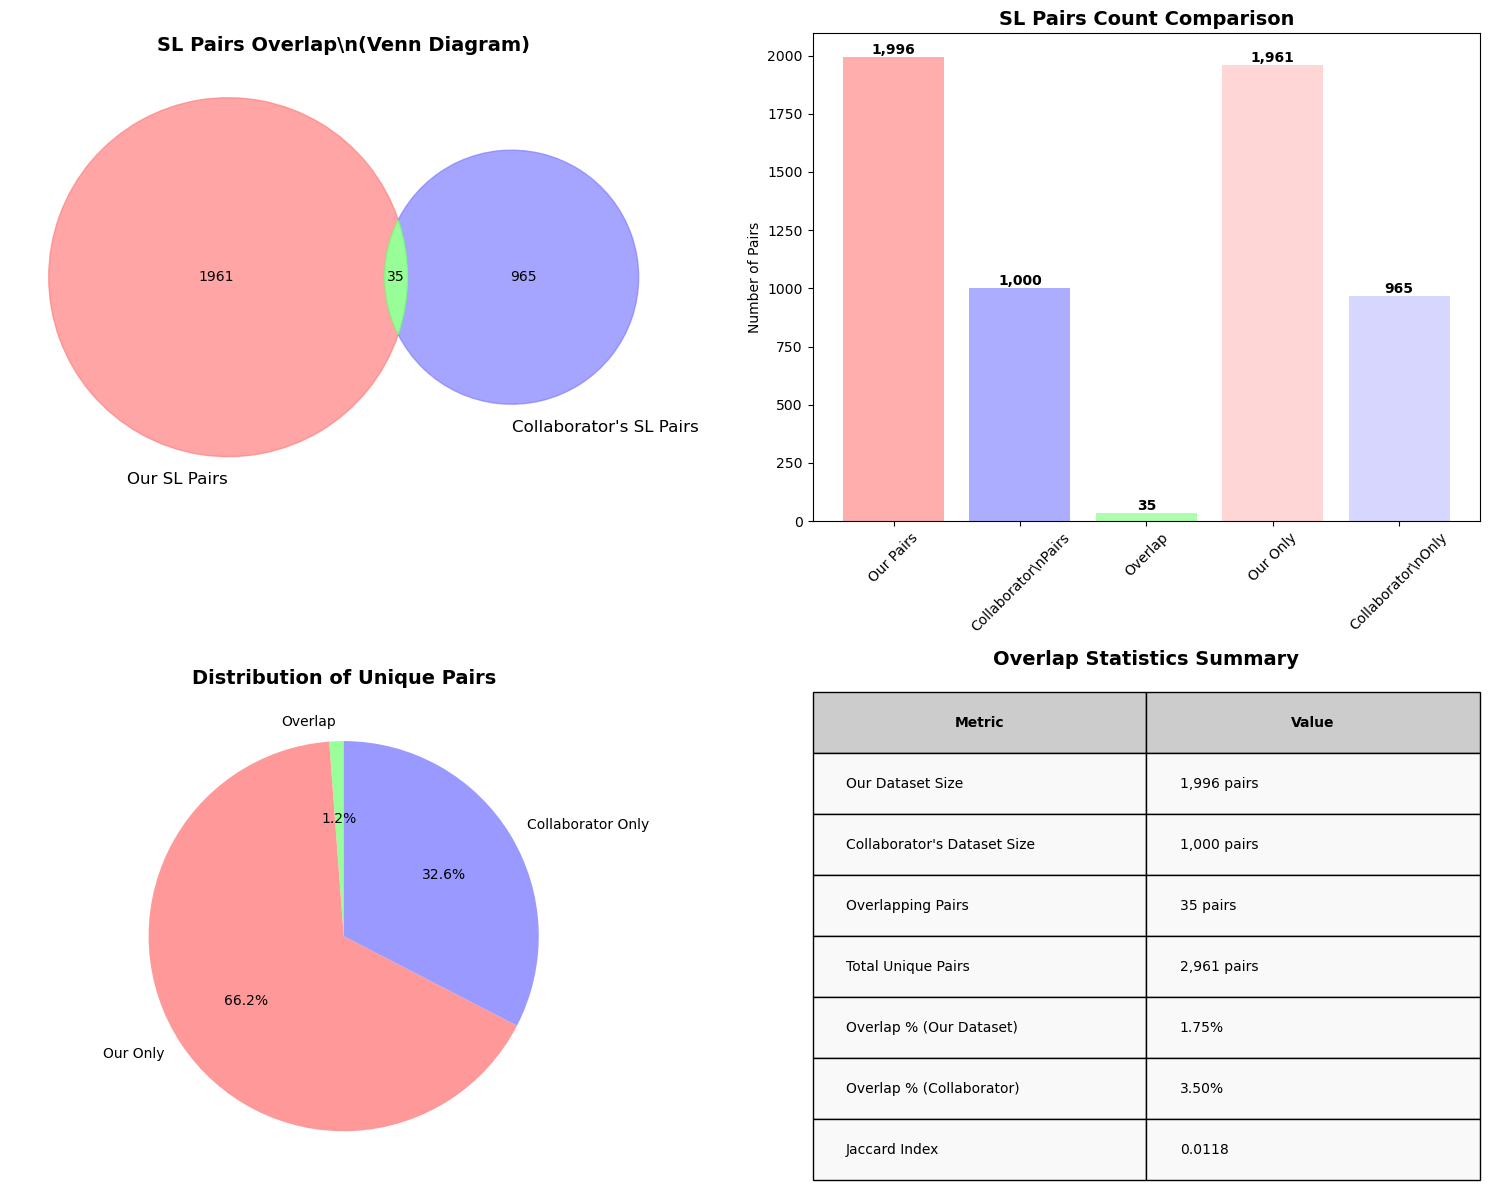

In [6]:
# Create visualizations for the overlap analysis
if 'overlap_results' in locals():
    # Set up the plotting environment
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Venn Diagram
    counts = overlap_results['counts']
    venn = venn2(subsets=(counts['our_only'], counts['collaborator_only'], counts['overlap']), 
                 set_labels=('Our SL Pairs', "Collaborator's SL Pairs"), ax=ax1)
    
    # Customize venn diagram
    if venn.get_patch_by_id('10'):
        venn.get_patch_by_id('10').set_color('#ff7f7f')  # Our only - light red
        venn.get_patch_by_id('10').set_alpha(0.7)
    if venn.get_patch_by_id('01'):
        venn.get_patch_by_id('01').set_color('#7f7fff')  # Collaborator only - light blue
        venn.get_patch_by_id('01').set_alpha(0.7)
    if venn.get_patch_by_id('11'):
        venn.get_patch_by_id('11').set_color('#7fff7f')  # Overlap - light green
        venn.get_patch_by_id('11').set_alpha(0.8)
    
    ax1.set_title('SL Pairs Overlap\\n(Venn Diagram)', fontsize=14, fontweight='bold')
    
    # 2. Bar chart of counts
    categories = ['Our Pairs', 'Collaborator\\nPairs', 'Overlap', 'Our Only', 'Collaborator\\nOnly']
    values = [counts['our'], counts['collaborator'], counts['overlap'], 
              counts['our_only'], counts['collaborator_only']]
    colors = ['#ff9999', '#9999ff', '#99ff99', '#ffcccc', '#ccccff']
    
    bars = ax2.bar(categories, values, color=colors, alpha=0.8)
    ax2.set_title('SL Pairs Count Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Number of Pairs')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Percentage pie chart
    pie_labels = ['Overlap', 'Our Only', 'Collaborator Only']
    pie_sizes = [counts['overlap'], counts['our_only'], counts['collaborator_only']]
    pie_colors = ['#99ff99', '#ff9999', '#9999ff']
    
    wedges, texts, autotexts = ax3.pie(pie_sizes, labels=pie_labels, colors=pie_colors, 
                                      autopct='%1.1f%%', startangle=90)
    ax3.set_title('Distribution of Unique Pairs', fontsize=14, fontweight='bold')
    
    # 4. Overlap statistics table
    ax4.axis('off')
    
    # Create statistics table
    stats_data = [
        ['Metric', 'Value'],
        ['Our Dataset Size', f'{counts["our"]:,} pairs'],
        ["Collaborator's Dataset Size", f'{counts["collaborator"]:,} pairs'],
        ['Overlapping Pairs', f'{counts["overlap"]:,} pairs'],
        ['Total Unique Pairs', f'{counts["total_unique"]:,} pairs'],
        ['Overlap % (Our Dataset)', f'{overlap_results["percentages"]["our_overlap"]:.2f}%'],
        ['Overlap % (Collaborator)', f'{overlap_results["percentages"]["collaborator_overlap"]:.2f}%'],
        ['Jaccard Index', f'{overlap_results["percentages"]["jaccard"]:.4f}']
    ]
    
    # Create table
    table = ax4.table(cellText=stats_data[1:], colLabels=stats_data[0],
                     cellLoc='left', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Style the table
    for i in range(len(stats_data)):
        for j in range(2):
            cell = table[i, j]
            if i == 0:  # Header
                cell.set_facecolor('#cccccc')
                cell.set_text_props(weight='bold')
            else:
                cell.set_facecolor('#f9f9f9')
    
    ax4.set_title('Overlap Statistics Summary', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(f'./{RESULT_DIR}/sl_pairs_overlap_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No overlap results available for visualization")


In [7]:
# Show examples of overlapping and unique pairs
if 'overlap_results' in locals():
    print("\n" + "="*70)
    print("DETAILED PAIR ANALYSIS")
    print("="*70)
    
    # Show some examples of overlapping pairs
    if len(overlap_results['overlap_pairs']) > 0:
        print(f"\nEXAMPLES OF OVERLAPPING PAIRS (found in both datasets):")
        print("-" * 50)
        sample_overlap = list(overlap_results['overlap_pairs'])[:15]
        for i, (gene1, gene2) in enumerate(sample_overlap, 1):
            print(f"{i:2d}. {gene1} ↔ {gene2}")
        if len(overlap_results['overlap_pairs']) > 15:
            print(f"    ... and {len(overlap_results['overlap_pairs']) - 15} more")
    
    # Show some examples of pairs only in our dataset
    if len(overlap_results['our_only']) > 0:
        print(f"\nEXAMPLES OF PAIRS ONLY IN OUR DATASET:")
        print("-" * 40)
        sample_our = list(overlap_results['our_only'])[:10]
        for i, (gene1, gene2) in enumerate(sample_our, 1):
            print(f"{i:2d}. {gene1} ↔ {gene2}")
        if len(overlap_results['our_only']) > 10:
            print(f"    ... and {len(overlap_results['our_only']) - 10} more")
    
    # Show some examples of pairs only in collaborator's dataset
    if len(overlap_results['collaborator_only']) > 0:
        print(f"\nEXAMPLES OF PAIRS ONLY IN COLLABORATOR'S DATASET:")
        print("-" * 50)
        sample_collab = list(overlap_results['collaborator_only'])[:10]
        for i, (gene1, gene2) in enumerate(sample_collab, 1):
            print(f"{i:2d}. {gene1} ↔ {gene2}")
        if len(overlap_results['collaborator_only']) > 10:
            print(f"    ... and {len(overlap_results['collaborator_only']) - 10} more")



DETAILED PAIR ANALYSIS

EXAMPLES OF OVERLAPPING PAIRS (found in both datasets):
--------------------------------------------------
 1. ENO1 ↔ ENO2
 2. EXOC6 ↔ EXOC6B
 3. ELMO1 ↔ ELMO2
 4. ATP2B1 ↔ ATP2B4
 5. GSPT1 ↔ GSPT2
 6. ATP6V1C1 ↔ ATP6V1C2
 7. ELMO2 ↔ ELMO3
 8. CSTF2 ↔ CSTF2T
 9. STRIP1 ↔ STRIP2
10. CAB39 ↔ CAB39L
11. CTBP1 ↔ CTBP2
12. SMARCA2 ↔ SMARCA4
13. CCND1 ↔ CCND2
14. EAF1 ↔ EAF2
15. UAP1 ↔ UAP1L1
    ... and 20 more

EXAMPLES OF PAIRS ONLY IN OUR DATASET:
----------------------------------------
 1. CLUH ↔ TTC26
 2. TBX3 ↔ TP53I3
 3. CDC123 ↔ FAM229A
 4. PTER ↔ SAP18
 5. CTF1 ↔ TPRKB
 6. PCDH9 ↔ ZKSCAN7
 7. CAPN8 ↔ ELP6
 8. IGIP ↔ WDR4
 9. ARHGAP1 ↔ NAPRT
10. NEUROD1 ↔ SIAH2
    ... and 1951 more

EXAMPLES OF PAIRS ONLY IN COLLABORATOR'S DATASET:
--------------------------------------------------
 1. CSNK2A1 ↔ CSNK2A3
 2. CDKN2B ↔ PER2
 3. ADAM9 ↔ PTEN
 4. PGM3 ↔ PTEN
 5. CDKN2A ↔ TEX15
 6. ACACA ↔ ACACB
 7. SMAD1 ↔ SMAD9
 8. AP2A1 ↔ AP2A2
 9. IFNA10 ↔ RB1
10. FLNA ↔ FLN

In [8]:
# Save overlap analysis results to files
if 'overlap_results' in locals():
    print("\n" + "="*60)
    print("SAVING RESULTS")
    print("="*60)
    
    # Create output directory if it doesn't exist
    os.makedirs(RESULT_DIR, exist_ok=True)
    
    # Save overlapping pairs to CSV
    if len(overlap_results['overlap_pairs']) > 0:
        overlap_df = pd.DataFrame(list(overlap_results['overlap_pairs']), 
                                columns=['Gene1', 'Gene2'])
        overlap_df.to_csv(f'./{RESULT_DIR}/overlapping_sl_pairs.csv', index=False)
        print(f"Saved {len(overlap_df)} overlapping pairs to overlapping_sl_pairs.csv")
    
    # Save pairs unique to our dataset
    if len(overlap_results['our_only']) > 0:
        our_only_df = pd.DataFrame(list(overlap_results['our_only']), 
                                 columns=['Gene1', 'Gene2'])
        our_only_df.to_csv(f'./{RESULT_DIR}/our_unique_sl_pairs.csv', index=False)
        print(f"Saved {len(our_only_df)} pairs unique to our dataset to our_unique_sl_pairs.csv")
    
    # Save pairs unique to collaborator's dataset
    if len(overlap_results['collaborator_only']) > 0:
        collab_only_df = pd.DataFrame(list(overlap_results['collaborator_only']), 
                                    columns=['Gene1', 'Gene2'])
        collab_only_df.to_csv(f'./{RESULT_DIR}/collaborator_unique_sl_pairs.csv', index=False)
        print(f"Saved {len(collab_only_df)} pairs unique to collaborator's dataset to collaborator_unique_sl_pairs.csv")
    
    # Create summary report
    jaccard_val = overlap_results['percentages']['jaccard']
    if jaccard_val < 0.3:
        similarity_level = 'low'
    elif jaccard_val < 0.7:
        similarity_level = 'moderate'
    else:
        similarity_level = 'high'
    
    # Build the report string
    report_lines = [
        "SL PAIRS OVERLAP ANALYSIS REPORT",
        "="*50,
        f"Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}",
        "",
        "COLUMN MAPPING:",
        "- Our dataset: target_gene ↔ biomarker_gene",
        "- Collaborator's dataset: sg1_symbol ↔ sg2_symbol",
        "- Order-independent comparison: (A,B) = (B,A)",
        "",
        "DATASET SIZES:",
        f"- Our SL pairs: {overlap_results['counts']['our']:,} unique pairs",
        f"- Collaborator's SL pairs: {overlap_results['counts']['collaborator']:,} unique pairs",
        f"- Total unique pairs (union): {overlap_results['counts']['total_unique']:,} pairs",
        "",
        "OVERLAP ANALYSIS:",
        f"- Overlapping pairs: {overlap_results['counts']['overlap']:,} pairs",
        f"- Pairs only in our dataset: {overlap_results['counts']['our_only']:,} pairs",
        f"- Pairs only in collaborator's dataset: {overlap_results['counts']['collaborator_only']:,} pairs",
        "",
        "OVERLAP PERCENTAGES:",
        f"- Overlap as % of our dataset: {overlap_results['percentages']['our_overlap']:.2f}%",
        f"- Overlap as % of collaborator's dataset: {overlap_results['percentages']['collaborator_overlap']:.2f}%",
        f"- Jaccard Index (overlap/union): {overlap_results['percentages']['jaccard']:.4f}",
        "",
        "INTERPRETATION:",
        "- The Jaccard Index ranges from 0 (no overlap) to 1 (complete overlap)",
        f"- A Jaccard Index of {jaccard_val:.4f} indicates {similarity_level} similarity between datasets",
        f"- {overlap_results['percentages']['our_overlap']:.1f}% of our pairs are validated by the collaborator's list",
        f"- {overlap_results['percentages']['collaborator_overlap']:.1f}% of the collaborator's pairs are present in our dataset",
        "",
        "FILES GENERATED:",
        "- sl_pairs_overlap_analysis.png: Comprehensive visualization",
        "- overlapping_sl_pairs.csv: Pairs found in both datasets",
        "- our_unique_sl_pairs.csv: Pairs unique to our dataset",
        "- collaborator_unique_sl_pairs.csv: Pairs unique to collaborator's dataset"
    ]
    
    summary_report = "\n".join(report_lines)
    
    # Save summary report
    with open(f'./{RESULT_DIR}/sl_pairs_overlap_summary.txt', 'w') as f:
        f.write(summary_report)
    
    print(f"\nSaved comprehensive summary report to sl_pairs_overlap_summary.txt")
    print("\n" + summary_report)



SAVING RESULTS
Saved 35 overlapping pairs to overlapping_sl_pairs.csv
Saved 1961 pairs unique to our dataset to our_unique_sl_pairs.csv
Saved 965 pairs unique to collaborator's dataset to collaborator_unique_sl_pairs.csv

Saved comprehensive summary report to sl_pairs_overlap_summary.txt

SL PAIRS OVERLAP ANALYSIS REPORT
Generated on: 2025-10-20 12:21:03

COLUMN MAPPING:
- Our dataset: target_gene ↔ biomarker_gene
- Collaborator's dataset: sg1_symbol ↔ sg2_symbol
- Order-independent comparison: (A,B) = (B,A)

DATASET SIZES:
- Our SL pairs: 1,996 unique pairs
- Collaborator's SL pairs: 1,000 unique pairs
- Total unique pairs (union): 2,961 pairs

OVERLAP ANALYSIS:
- Overlapping pairs: 35 pairs
- Pairs only in our dataset: 1,961 pairs
- Pairs only in collaborator's dataset: 965 pairs

OVERLAP PERCENTAGES:
- Overlap as % of our dataset: 1.75%
- Overlap as % of collaborator's dataset: 3.50%
- Jaccard Index (overlap/union): 0.0118

INTERPRETATION:
- The Jaccard Index ranges from 0 (no over